<h1>Multistep methods</h1>

<p>Consider the IVP</p>


$$
x'(t) = f(t,x), \quad x(t_0) = x_0
$$


<p>Then to find $x(t+h)$ knowing $x(h)$ we could write</p>


$$
x(t + h) - x(t) = \int_t^{t+h} x'(t) dt = \int_t^{t+h} f(t, x(t)) dt.
$$


<p>If we can compute the integral, then we are done. This can happen when $f(t,x)$ depends on only on $t$. In general, we can't compute the integral, but we could approximate it. A scheme may be to consider points between the $t$ and $t+h$, uses these to find an interpolating polynomial and then integrate that.</p>

<h2>Multistep models</h2>

<p>If we have time steps $t_0, t_1, \dots$, then we can consider our solutions to depend on one or more previous steps. Euler's method uses one, with $f(t,x(t)) \approx f(t_n, x_n)$ (a constant) then</p>


$$
x(t+h) - x(t) = \int_t^{t+h} f(t, x(t)) dt \approx \int_t^{t+h} f(t_n,x(t_n)) dt = h \cdot f(t_n, x_n).
$$


<p>So we write:</p>


$$
x_{n+1} = x_n + h\cdot f(t_n, x_n).
$$


<p>The general multistep model allows for more than one. A general form might look like this (from p557)</p>


$$
a_k x_n + a_{k-1}x_{n-1} + \cdots + a_0 x_{n-k} =
h( b_k f_n + f_{k-1} f_{n-1} + \cdots + b_0 f_{n-k}).
$$


<p>With this indexing, Euler's method, $1\cdot x_n - 1\cdot x_{n-1} = h \cdot 1 \cdot \cdot f_n$, has</p>


$$
a_1=1, a_0=-1, b_1=0, b_0=1.
$$


<h2>Adams Bashworth</h2>

<p>A means to generate multistep models is to return to the formula $x(t+h) - x(t)=\int_t^{t+h} x'(t) dt.$</p>

<p>For a concrete example, take the time points $t_n, t_{n+1}, t_{n+2}$. We will use the values $t_n$ and $t_{n+1}$ to interpolate the polynomial and use this polynomial to approximate</p>


$$
x_{n+2} - x_{n+1} = \int_{t_{n+1}}^{t_{n+2}} x'(t) dt\approx \int_{t_{n+1}}^{t_{n+2}} p(t) dt
$$


<p>Where for this set of points, with a labeling $u_0 = t_n$ and $u_1=t_{n+1}$ we have</p>


$$
p(t) = \sum f(u_i) \prod_{j=0, j\neq i}^k \frac{t - u_j}{u_i - u_j} = f(u_0) \frac{t-u_1}{u_0 - u_1} + f(u_1)\frac{t-u_0}{u_1-u_0}
$$


<p>We can integrate $p$ to get $f(u_0) l_0 + f(u_1) l_1$ where, for example, $l_0$ is given by:</p>

In [1]:
using SymPy
u, t, h = symbols("u,t, h")
u0, u1, u2 = t, t+h, t+2h
integrate((u-u1)/(u0 - u1), (u, u1,u2)) |> simplify

<p>And $l_1$ by:</p>

In [1]:
integrate((u-u0)/(u1 - u0), (u, u1,u2))  |> simplify

<p>Putting these together gives a formula:</p>


$$
x_{n+2} - x_{n+1} \approx h (\frac{3}{2} f_{n+1} - \frac{1}{2} f_n).
$$


<p>This is an Adams Bashworth formula. It is a multstep model with $a_2=1, a_1=-1, a_0=0$ and $b_0=0, b_1=3/2, b_0=-1/2$.</p>

<p>The local error will be basically $h\cdot \mathcal{O}(h^2)$, as the linear polynomial approximation has the $h^2$ error.</p>

<h3>Method of undetermind coefficients</h3>

<p>Another way to derive this is to <em>assume</em> the approximation $a f_{n+1} + b f_n$ is exact for <em>polynomials</em> of degree 1 or less, and integrate. Using $p(t) = 1$ and then $p(t) = t$ and <em>assuming</em> (without loss of generality that $t_{n+1}=0$, $t_{n+2} = 1$ that</p>


$$
\int_{t_n}^{t_{n+1}} 1 dt = 1 = h = h \cdot (a \cdot 1 + b \cdot 1),
\quad \text{or}\quad 1 = a + b,
$$


<p>and</p>


$$
\int_{t_n}^{t_{n+1}} t dt = 1/2 = (a \cdot 0 + b \cdot (-1)),
\quad\text{or}\quad 1/2 = -b.
$$


<p>Piecing togther, we get $x_{n+2} - x_{n+1} = 3/2 x_{n+1} - 1/2 x_n$.</p>

<h2>Adams Moulton</h2>

<p>What if we had used all three points, $t_n, t_{n+1},$ <strong>and</strong> $t_{n+2}$ to approximate $f$? The error would be like $h^3$ then. The right hand side would become:</p>


$$
b_2 f(t_n+2) + b_1f(t_{n+1}) + b_0 f(t_n)
$$


<p>Where we get $b_2$ from:</p>

In [1]:
integrate( (u - u0) * (u-u1) / (u2-u0) / (u2 - u1), (u, u1, u2))  |> simplify

<p>And $b_1$ from:</p>

In [1]:
integrate( (u - u0) * (u-u2) / (u1-u0) / (u1 - u2), (u, u1, u2))  |> simplify

<p>And finally, $b_0$ from:</p>

In [1]:
integrate( (u - u1) * (u-u2) / (u0-u1) / (u0 - u2), (u, u1, u2))  |> simplify

<p>Putting these together gives the formula:</p>


$$
x_{n+2} - x_{n+1} \approx h (\frac{5}{12} f_{n+2} - \frac{2}{3}
f_{n+1} - \frac{1}{12} f_n).
$$


<p>This of course could be <a href="https://en.wikipedia.org/wiki/Linear_multistep_method">generalized</a> by taking more points. The book shows a higher order value.</p>

<blockquote>
<p>Note: we can't explicitly solve for $x_{n+2}$ as it appears on <em>both</em> sides of the equation – the right-hand side has $f_{n+2}=f(t_{n+2},x_{n+2})$.</p>
</blockquote>

<h2>Example</h2>

<p>No. 3 on p556: Compute the solution to the IVP $x' = -2tx^2$, $x_0 = 1$ using the <em>fourth-order</em> Adams-Bashworth-Moulton method together with a fourth order Runge Kutta method.</p>

<p>Find the solution at $x=1$ with $h=0.25$.</p>

<p>So, we have</p>

In [1]:
ts = [0, 0.25, 0.5, 0.75, 1.0] # t0, t1, t2,t3,t4

5-element Array{Float64,1}:
 0.0 
 0.25
 0.5 
 0.75
 1.0 

<p>We have</p>

In [1]:
x0 = 1

1

<p>The fourth order ABM method use AB to help with AM (p555 p5):</p>


$$
x_{n+1} = x_n + h/24 (9f_{n+1} + 19f_n - 5f_{n-1} + f_{n-2})
$$


<p>We shift things forward by $2$ to get:</p>


$$
x_{n+3} = x_{n+2} + h/24 \cdot (9f_{n+3} +19f_{n+2} - 5f_{n+1} + f_n)
$$


<p>When $n=1$ this gives $x_4$ </p>

<p><em>But</em> we have in $f_{n+3} = f(t_{n+3}, x_{n+3})$, so we have $x_{n+3}$ on both sides. To work around that we use the <em>explicit</em> method (8.4p4):</p>


$$
x_{n+4} = x_{n+3} + h/24 [55 f_{n+3} - 59f_{n+2} + 37f_{n+1} - 9f_n]
$$


<p>At $n=0$ this gives $x_4$ in terms of previoius values $x_3, x_2, x_1$ and the given value of $x_0$.</p>

<p>To get estimates for those, we will use a fourth order Runge Kutta (p541)</p>

In [1]:
function rk4(f, t, x, h)
F1 = h*f(t, x)
F2 = h * f(t + h/2 , x + F1/2)
F3 = h*f(t + h/2, x + F2/2)
F4 = h*f(t+h, x + F3)
xn1 = x + 1/6 *(F1 + F2 + 2F3 + F4)
t+h, xn1
end

f(t, x) = -2 * t * x^2
h = 1/4
t0, x0 = 0, 1
t1, x1 = rk4(f, t0, x0, h)
t2, x2 = rk4(f, t1, x1, h)
t3, x3 = rk4(f, t2, x2, h)

(0.75, 0.6896121671116674)

<p>Now we use one step of the explicit method to estimate $x_4$:</p>

In [1]:
f0, f1, f2, f3 = f(t0,x0), f(t1,x1), f(t2,x2), f(t3, x3)

ax4 = x3 + h/24 * (55*f3 - 59*f2 + 37*f1 - 9f0)

0.4386104472371479

<p>Now use this with the Adams Moulton formula:</p>

In [1]:
t4 = t3 + h
f4 = f(t4, ax4)
x4 = x3 + h/24 * (8*f4 + 19*f3 - 5*f2 + f1)

0.5477454715990696

<p>Okay, how did we do? The book says the exact solution is $1/(1+x^2)$, so at 1 should be $1/2$:</p>

In [1]:
x4 - 1/(1+1^2)

0.04774547159906961

<p>So with $h=2.5\cdot 10^{-1}$ we have $h^4 \approx$ <code>4e-3</code> and this error is about <code>4e-2</code> or 10 times what we might hope for is best.</p>

<p>So, with this in mind. Let's suppose our error is going to be $10h^4$.  How small should $h$ be so that our error is less than $10^{-5}$? Well, $h^4 = 10^{-4}$ or $h=1/10$. </p>

<h2>Stiff equations</h2>

<p>Some equations are problematic unless the step size is small. These are called <strong>stiff</strong> equations.</p>

<p>An example comes from <a href="https://en.wikipedia.org/wiki/Stiff_equation">wikipedia</a>:</p>


$$
x'(t) = -15x, \quad x(0) = 1
$$


<p>We can easily solve this for $t \geq 0$ to be $e^{-15t}$ – a rapidly decaying function.</p>

<p>So the value at $t=1$ is $e^{-15}$ or basically 0.</p>

<p>What happens if we try Euler's method here with a large step size, say $h=1/4$?</p>

In [1]:
f(t, x) = -15x
h = 1/4
ts=[0.0]
xs = [1.0]

for k=1:4
t,x = ts[end], xs[end]
xnew = x + h * f(t,x)
push!(xs, xnew)
push!(ts, t + h)
end

<p>We get the estimate at $1$ of:</p>

In [1]:
xs[end]

57.19140625

<p>Wow, way off. What happened?</p>

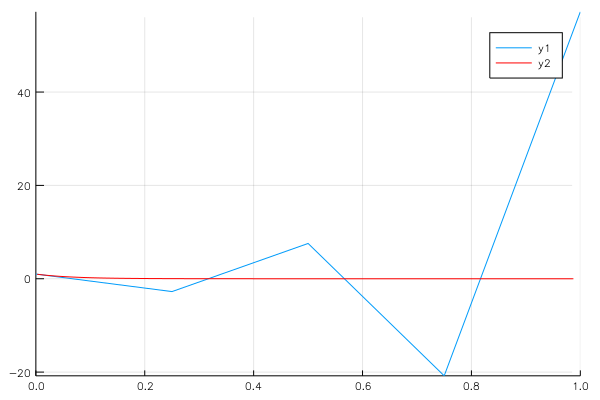

In [1]:
using Plots
plot(ts, xs)
plot!(t -> exp(-15t), 0, 1, color=:red)

<p>The solution seems to be escaping and oscillating.</p>

<p>The reason being, when $x > 0$, the term $f(t,x) = -15x$ means there is a large negative contribution driving the equation back towards 0, and when $x < 0$ the term $f(t,x) - 15$ means there is a large positive contribution driving the equation back to 0.</p>

<h3>What to do?</h3>

<p>We could take $h$ much smaller:</p>

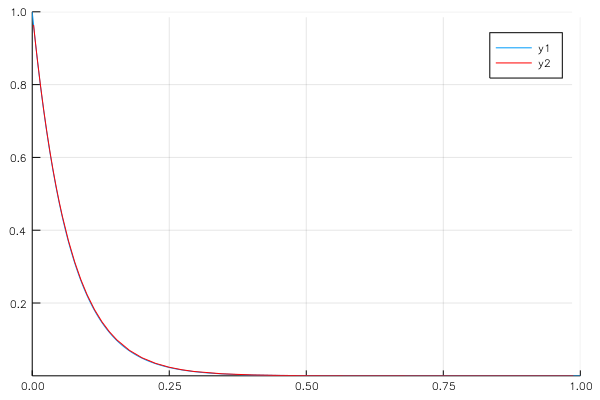

In [1]:
f(t, x) = -15x
h = 1e-3
ts=[0.0]
xs = [1.0]

for k=1:1e3
t,x = ts[end], xs[end]
xnew = x + h * f(t,x)
push!(xs, xnew)
push!(ts, t + h)
end

plot(ts, xs)
plot!(t -> exp(-15t), 0, 1, color=:red) 

<p>But that seems wasteful.</p>

<p>Altenatively we could use an implicit method.</p>

<h3>Implict Euler method.</h3>

<p>The implicit Euler method is a multistep method of this form:</p>


$$
x_{n+1} = x_n + hf(t_{n+1}, x_{n+1})
$$


<p>We have $x_{n+1}$ on both sides of the equation. What to do? We could a) do a predictor-corrector thing b) solve the non-linear equation. We will try the latter.</p>


$$
F(u; t_{n+1}, x_n) =  (x_n + hf(t_{n+1}, u)).
$$


<p>The solution to $F(s)=s$ is $x_{n+1}$. We have many ways to solve this: iteration, Newton, ... We use the <code>fzero</code> function in the <code>Roots</code> package for convenience.</p>

In [1]:
using Roots

<p>Then our backwards Euler becomes:</p>

In [1]:
f(t,x) = -15x
h = 1/4
F(u, t, x) = x + h*f(t, u)
ts = [0.0]
xs = [1.0]
for k in 1:4
t,x = ts[end], xs[end]
xnew = fzero(u -> F(u, t, x) - u, x)
push!(ts, t+h)
push!(xs, xnew)
end

<p>We get:</p>

In [1]:
xs[end]

0.0019643802610477363

<p>And this graph</p>

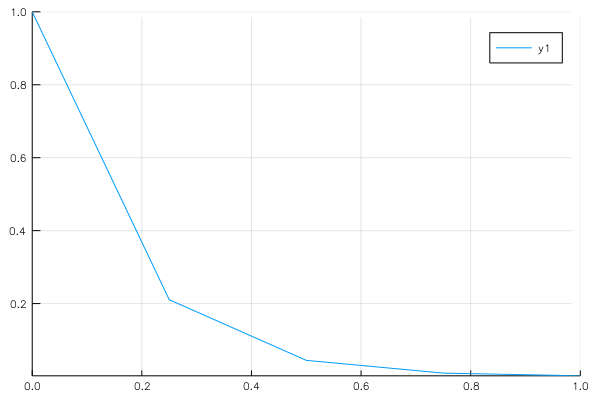

In [1]:
plot(ts, xs)

<p>Much better!</p>